# Electricity network configuration

In [1]:
import pandapower as pp
import numpy as np
import pandas as pd
import simbench as sb
import matplotlib.pyplot as plt
import pandapower.plotting as plot
import os 


### Simbench data

**The network data is based on the Simbench research project** <br>
**Meinecke et al., 2020 "*SimBench - A Benchmark Dataset of Electric Power Systems to Compare Innovative Solutions Based on Power Flow Analysis*"**


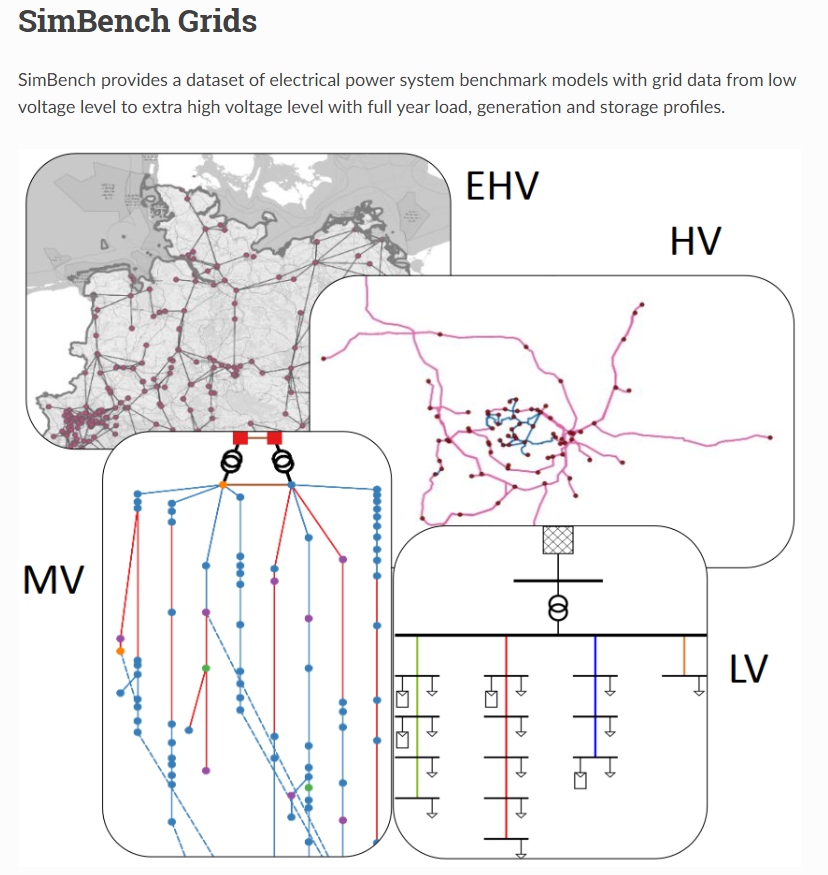

**The Low voltage network data is derived from the German federal statistical office (DESTATIS) with k-means clustering** <br>
**Sarajlic and Rehtanz, 2019 "*Low Voltage Benchmark Distribution Network Models Based on Publicly Available Data*"**

In [2]:
# get the simbench code from data distributor 
simbench_code = "1-LV-urban6--0-no_sw"

# create network from simbench data
net = sb.get_simbench_net (simbench_code)

C:\Users\Richard\AppData\Roaming\Python\Python39\site-packages\simbench\networks\extract_simbench_grids_from_csv.py:326: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  buses_at_sw = net.switch.bus.append(net.switch.element.loc[net.switch.et == "b"])


In [3]:
net

This pandapower network includes the following parameter tables:
   - bus (59 elements)
   - load (111 elements)
   - sgen (5 elements)
   - ext_grid (1 element)
   - line (57 elements)
   - trafo (1 element)
   - bus_geodata (59 elements)
   - loadcases (6 elements)

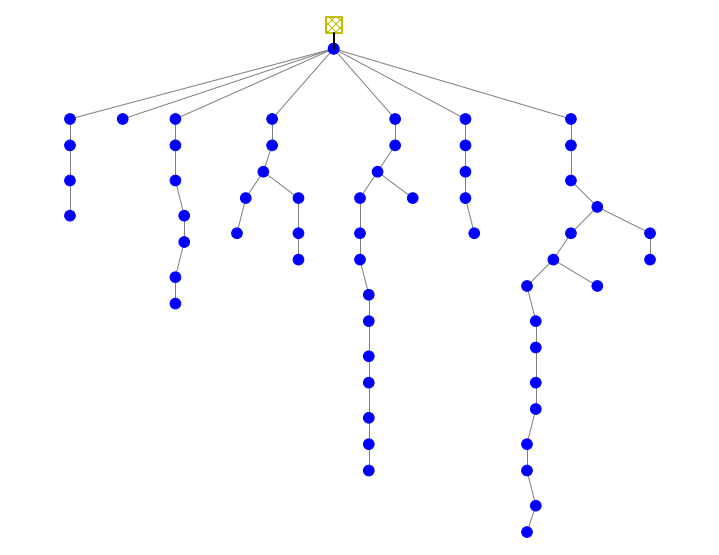

<AxesSubplot:>

In [4]:

pp.plotting.simple_plot (net)

In [5]:
# net.load.to_csv('Bus_load.csv', index=True)

#### Create additional MV buses as aggregators 

In [6]:
# assign coordinate to the nodes
coord_59 = (11.8131,53.4244)
coord_60 = (11.8171,53.4244)

In [7]:
#create buse_60, bus_61, bus_62, and bus_63
pp.create_bus(net, vn_kv = 0.4, 
              name = "LV6.201 Bus 60", 
              type = 'b',  
              geodata = coord_59,
              min_vm_pu = 0.9, 
              max_vm_pu = 1.1, 
              in_service = True, 
              voltLvl = 7, 
              subnet = "LV6.201" )

pp.create_bus(net, 
              vn_kv = 0.4, 
              name = "LV6.201 Bus 61", 
              type = 'b',  
              geodata = coord_60,
              min_vm_pu = 0.9, 
              max_vm_pu = 1.1, 
              in_service = True, 
              voltLvl = 7, 
              subnet = "LV6.201" )

pp.create_bus(net, vn_kv = 20, 
              name = "MV2.101 Bus 62", 
              type = 'b',  
              geodata = coord_59,
              min_vm_pu = 0.965, 
              max_vm_pu = 1.055, 
              in_service = True, 
              voltLvl = 5, 
              subnet = "MV2.101_LV6.201_Feeder2" )

pp.create_bus(net, 
              vn_kv = 20, 
              name = "MV2.101 Bus 63", 
              type = 'b', 
              geodata = coord_60,
              min_vm_pu = 0.965, 
              max_vm_pu = 1.055, 
              in_service = True, 
              voltLvl = 5, 
              subnet = "MV2.101_LV6.201_Feeder3" )
              

178

In [8]:
net.bus

,name,vn_kv,type,zone,in_service,max_vm_pu,subnet,voltLvl,min_vm_pu,substation
0,LV6.201 Bus 9,0.4,b,NaN,True,1.100,LV6.201,7,0.900,NaN
1,LV6.201 Bus 1,0.4,b,NaN,True,1.100,LV6.201,7,0.900,NaN
2,LV6.201 Bus 12,0.4,b,NaN,True,1.100,LV6.201,7,0.900,NaN
3,LV6.201 Bus 28,0.4,b,NaN,True,1.100,LV6.201,7,0.900,NaN
4,LV6.201 Bus 44,0.4,b,NaN,True,1.100,LV6.201,7,0.900,NaN
...,...,...,...,...,...,...,...,...,...,...
174,MV2.101 Bus 4,20.0,b,NaN,True,1.055,MV2.101_LV6.201_Feeder1,5,0.965,NaN
175,LV6.201 Bus 60,0.4,b,None,True,1.100,LV6.201,7,0.900,NaN
176,LV6.201 Bus 61,0.4,b,None,True,1.100,LV6.201,7,0.900,NaN
177,MV2.101 Bus 62,20.0,b,None,True,1.055,MV2.101_LV6.201_Feeder2,5,0.965,NaN


In [9]:
#print(net.bus_geodata) 

In [10]:
# net.bus_geodata.to_csv('Bus_geo_data_2.csv', index=True)

#### Cofigurate aggregators 

In [11]:
# add transformer
# setting the transformer capacity 
TransLoad_constraint = 100.0
pp.create_transformer (net, name = "MV2.101-LV6.201-Trafo 2", 
                       hv_bus = 177, 
                       lv_bus = 175, 
                       std_type = '0.63 MVA 20/0.4 kV Dyn5 ASEA',
                       max_loading_percent = TransLoad_constraint,
                      )

pp.create_transformer (net, name = "MV2.101-LV6.201-Trafo 3", 
                       hv_bus = 178, 
                       lv_bus = 176, 
                       std_type =  '0.63 MVA 20/0.4 kV Dyn5 ASEA',
                       max_loading_percent = TransLoad_constraint,
                      )

2

In [12]:
net.trafo

,name,std_type,hv_bus,lv_bus,sn_mva,vn_hv_kv,vn_lv_kv,vk_percent,vkr_percent,pfe_kw,...,parallel,df,in_service,autoTapSide,autoTap,autoTapSetp,subnet,voltLvl,substation,max_loading_percent
0,MV2.101-LV6.201-Trafo 1,0.63 MVA 20/0.4 kV Dyn5 ASEA,174,0,0.63,20.0,0.4,6.0,1.095238,1.65,...,1,1.0,True,None,0,NaN,LV6.201,6,NaN,100.0
1,MV2.101-LV6.201-Trafo 2,0.63 MVA 20/0.4 kV Dyn5 ASEA,177,175,0.63,20.0,0.4,6.0,1.095238,1.65,...,1,1.0,True,NaN,NaN,NaN,NaN,NaN,NaN,100.0
2,MV2.101-LV6.201-Trafo 3,0.63 MVA 20/0.4 kV Dyn5 ASEA,178,176,0.63,20.0,0.4,6.0,1.095238,1.65,...,1,1.0,True,NaN,NaN,NaN,NaN,NaN,NaN,100.0


#### Add external network connection to the high voltage side of transformer (aggregator)

In [13]:
pp.create_ext_grid (net, bus = 177, 
                    name = "MV2.101 grid at LV6.201 port2",
                    vm_pu = 1.025, 
                    va_degree = 0.0,
                    slack_weight = 1.0,
                    in_service = True)

pp.create_ext_grid (net, bus = 178, 
                    name = "MV2.101 grid at LV6.201 port3",
                    vm_pu = 1.025, 
                    va_degree = 0.0,
                    slack_weight = 1.0,
                    in_service = True)

2

In [14]:
net.ext_grid

,name,bus,vm_pu,va_degree,slack_weight,in_service,type,p_disp_mw,max_q_mvar,sn_mva,min_p_mw,phys_type,min_q_mvar,subnet,voltLvl,max_p_mw,profile
0,MV2.101 grid at LV6.201,174,1.025,0.0,1.0,True,NaN,NaN,NaN,NaN,NaN,ExternalNet,NaN,LV6.201_MV2.101_eq,5,NaN,NaN
1,MV2.101 grid at LV6.201 port2,177,1.025,0.0,1.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MV2.101 grid at LV6.201 port3,178,1.025,0.0,1.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Connect the aggregators to the LV network

In [15]:
# Setting the line capacity 
max_line_load = 100.0

In [16]:
# Connect aggregator_bus_175 to the LV network
pp.create_line (net, 
               from_bus = 11, to_bus = 175, 
                length_km = 0.02,
               std_type = 'NAYY 4x240SE 0.6/1kV', 
               name = 'LV6.201 line 58', 
               max_loading_percent = max_line_load)

pp.create_line (net, 
               from_bus = 27, to_bus = 175, 
                length_km = 0.02,
               std_type = 'NAYY 4x240SE 0.6/1kV', 
               name = 'LV6.201 line 59', 
               max_loading_percent = max_line_load)

pp.create_line (net, 
               from_bus = 34, to_bus = 175, 
                length_km = 0.02,
               std_type = 'NAYY 4x240SE 0.6/1kV', 
               name = 'LV6.201 line 60', 
               max_loading_percent = max_line_load)

pp.create_line (net, 
               from_bus = 38, to_bus = 175, 
                length_km = 0.02,
               std_type = 'NAYY 4x240SE 0.6/1kV', 
               name = 'LV6.201 line 61', 
               max_loading_percent = max_line_load)

pp.create_line (net, 
               from_bus = 46, to_bus = 175, 
                length_km = 0.02,
               std_type = 'NAYY 4x240SE 0.6/1kV', 
               name = 'LV6.201 line 62', 
               max_loading_percent = max_line_load)

pp.create_line (net, 
               from_bus = 53, to_bus = 175, 
                length_km = 0.02,
               std_type = 'NAYY 4x240SE 0.6/1kV', 
               name = 'LV6.201 line 63', 
               max_loading_percent = max_line_load)

pp.create_line (net, 
               from_bus = 54, to_bus = 175, 
                length_km = 0.02,
               std_type = 'NAYY 4x240SE 0.6/1kV', 
               name = 'LV6.201 line 64', 
               max_loading_percent = max_line_load)



63

In [17]:
# connect the aggregator_bus_176 to the LV network 

pp.create_line (net, 
               from_bus = 11, to_bus = 176, 
                length_km = 0.02,
               std_type = 'NAYY 4x240SE 0.6/1kV', 
               name = 'LV6.201 line 65', 
               max_loading_percent = max_line_load)

pp.create_line (net, 
               from_bus = 27, to_bus = 176, 
                length_km = 0.02,
               std_type = 'NAYY 4x240SE 0.6/1kV', 
               name = 'LV6.201 line 66', 
               max_loading_percent = max_line_load)

pp.create_line (net, 
               from_bus = 34, to_bus = 176, 
                length_km = 0.02,
               std_type = 'NAYY 4x240SE 0.6/1kV', 
               name = 'LV6.201 line 67', 
               max_loading_percent = max_line_load)

pp.create_line (net, 
               from_bus = 38, to_bus = 176, 
                length_km = 0.02,
               std_type = 'NAYY 4x240SE 0.6/1kV', 
               name = 'LV6.201 line 68', 
               max_loading_percent = max_line_load)

pp.create_line (net, 
               from_bus = 46, to_bus = 176, 
                length_km = 0.02,
               std_type = 'NAYY 4x240SE 0.6/1kV', 
               name = 'LV6.201 line 69', 
               max_loading_percent = max_line_load)

pp.create_line (net, 
               from_bus = 53, to_bus = 176, 
                length_km = 0.02,
               std_type = 'NAYY 4x240SE 0.6/1kV', 
               name = 'LV6.201 line 70', 
               max_loading_percent = max_line_load)

pp.create_line (net, 
               from_bus = 54, to_bus = 176, 
                length_km = 0.02,
               std_type = 'NAYY 4x240SE 0.6/1kV', 
               name = 'LV6.201 line 71', 
               max_loading_percent = max_line_load)

70

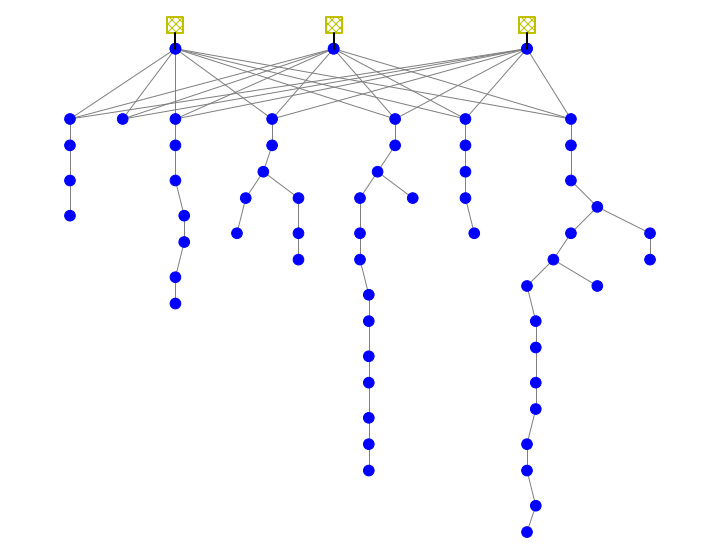

<AxesSubplot:>

In [18]:
plot.simple_plot(net, show_plot = True)

#### Summary of modified Simbench network data

In [19]:
net

This pandapower network includes the following parameter tables:
   - bus (63 elements)
   - load (111 elements)
   - sgen (5 elements)
   - ext_grid (3 elements)
   - line (71 elements)
   - trafo (3 elements)
   - bus_geodata (63 elements)
   - loadcases (6 elements)

The summary table of the bus data

In [21]:
net.bus

,name,vn_kv,type,zone,in_service,max_vm_pu,subnet,voltLvl,min_vm_pu,substation
0,LV6.201 Bus 9,0.4,b,NaN,True,1.100,LV6.201,7,0.900,NaN
1,LV6.201 Bus 1,0.4,b,NaN,True,1.100,LV6.201,7,0.900,NaN
2,LV6.201 Bus 12,0.4,b,NaN,True,1.100,LV6.201,7,0.900,NaN
3,LV6.201 Bus 28,0.4,b,NaN,True,1.100,LV6.201,7,0.900,NaN
4,LV6.201 Bus 44,0.4,b,NaN,True,1.100,LV6.201,7,0.900,NaN
...,...,...,...,...,...,...,...,...,...,...
174,MV2.101 Bus 4,20.0,b,NaN,True,1.055,MV2.101_LV6.201_Feeder1,5,0.965,NaN
175,LV6.201 Bus 60,0.4,b,None,True,1.100,LV6.201,7,0.900,NaN
176,LV6.201 Bus 61,0.4,b,None,True,1.100,LV6.201,7,0.900,NaN
177,MV2.101 Bus 62,20.0,b,None,True,1.055,MV2.101_LV6.201_Feeder2,5,0.965,NaN


Load data of the LV network

In [20]:
net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type,max_q_mvar,min_p_mw,min_q_mvar,subnet,voltLvl,max_p_mw,profile
0,LV6.201 Load 16,2,0.011,0.004347,0.0,0.0,0.011828,1.0,True,NaN,NaN,NaN,NaN,LV6.201,7,NaN,G1-B
1,LV6.201 Load 24,11,0.003,0.001186,0.0,0.0,0.003226,1.0,True,NaN,NaN,NaN,NaN,LV6.201,7,NaN,H0-L
2,LV6.201 Load 36,5,0.003,0.001186,0.0,0.0,0.003226,1.0,True,NaN,NaN,NaN,NaN,LV6.201,7,NaN,H0-A
3,LV6.201 Load 7,17,0.005,0.001976,0.0,0.0,0.005376,1.0,True,NaN,NaN,NaN,NaN,LV6.201,7,NaN,H0-C
4,LV6.201 Load 33,3,0.008,0.003162,0.0,0.0,0.008602,1.0,True,NaN,NaN,NaN,NaN,LV6.201,7,NaN,G1-B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,LV6.201 Load 89,8,0.003,0.001186,0.0,0.0,0.003226,1.0,True,NaN,NaN,NaN,NaN,LV6.201,7,NaN,H0-B
107,LV6.201 Load 90,8,0.003,0.001186,0.0,0.0,0.003226,1.0,True,NaN,NaN,NaN,NaN,LV6.201,7,NaN,H0-A
108,LV6.201 Load 91,8,0.002,0.000790,0.0,0.0,0.002151,1.0,True,NaN,NaN,NaN,NaN,LV6.201,7,NaN,H0-L
109,LV6.201 Load 105,33,0.003,0.001186,0.0,0.0,0.003226,1.0,True,NaN,NaN,NaN,NaN,LV6.201,7,NaN,H0-B


The deistributed energy resources (DER) as PVs

In [22]:
net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source,max_q_mvar,min_p_mw,phys_type,slack_weight,min_q_mvar,subnet,voltLvl,max_p_mw,profile
0,LV6.201 SGen 1,32,0.00520,0.0,0.00520,1.0,True,PV,NaN,NaN,NaN,RES,NaN,NaN,LV6.201,7,NaN,PV8
1,LV6.201 SGen 2,40,0.00783,0.0,0.00783,1.0,True,PV,NaN,NaN,NaN,RES,NaN,NaN,LV6.201,7,NaN,PV2
2,LV6.201 SGen 3,8,0.01470,0.0,0.01470,1.0,True,PV,NaN,NaN,NaN,RES,NaN,NaN,LV6.201,7,NaN,PV6
3,LV6.201 SGen 4,12,0.02520,0.0,0.02520,1.0,True,PV,NaN,NaN,NaN,RES,NaN,NaN,LV6.201,7,NaN,PV5
4,LV6.201 SGen 5,50,0.00420,0.0,0.02520,1.0,True,PV,NaN,NaN,NaN,RES,NaN,NaN,LV6.201,7,NaN,PV8


The network do not have conventional generator

In [26]:
net.gen

,name,bus,p_mw,vm_pu,sn_mva,min_q_mvar,max_q_mvar,scaling,slack,in_service,slack_weight,type,min_p_mw,phys_type,subnet,voltLvl,max_p_mw,profile


In [27]:
#export the network data to excel
pp.to_excel(net, "LV_63_Bus.xlsx", include_empty_tables=False, include_results=True)